In [1]:
##Import packages:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [2]:
##Import data:
weather_train=pd.read_csv('weather_train.csv')
weather_test=pd.read_csv('weather_test.csv')
test=pd.read_csv('test.csv')
train=pd.read_csv('train.csv')
sample_submission=pd.read_csv('sample_submission.csv')
building_metadata=pd.read_csv('building_metadata.csv')

In [3]:
##Building dataset:
building_metadata.head()

,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,Education,7432,2008.0,NaN
1,0,1,Education,2720,2004.0,NaN
2,0,2,Education,5376,1991.0,NaN
3,0,3,Education,23685,2002.0,NaN
4,0,4,Education,116607,1975.0,NaN


In [4]:
##Train data:
train.head()

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01 00:00:00,0.0
1,1,0,2016-01-01 00:00:00,0.0
2,2,0,2016-01-01 00:00:00,0.0
3,3,0,2016-01-01 00:00:00,0.0
4,4,0,2016-01-01 00:00:00,0.0


In [5]:
##Weather train data:
weather_train.head()

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,0,2016-01-01 01:00:00,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5
2,0,2016-01-01 02:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0
3,0,2016-01-01 03:00:00,21.1,2.0,20.6,0.0,1020.1,0.0,0.0
4,0,2016-01-01 04:00:00,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6


In [6]:
##Missing values:
print('Missing values for the train dataset (in %)\n ')
print(round(100*train.isnull().sum()),3)
print('\nMissing values for the weather train dataset (in %)\n')
print(round(100*weather_train.isnull().sum()),3)
print('\nMissing values for the building dataset (in %)\n')
print(round(100*building_metadata.isnull().sum()),3)

Missing values for the train dataset (in %)
 
building_id      0
meter            0
timestamp        0
meter_reading    0
dtype: int64 3

Missing values for the weather train dataset (in %)

site_id                     0
timestamp                   0
air_temperature          5500
cloud_coverage        6917300
dew_temperature         11300
precip_depth_1_hr     5028900
sea_level_pressure    1061800
wind_direction         626800
wind_speed              30400
dtype: int64 3

Missing values for the building dataset (in %)

site_id             0
building_id         0
primary_use         0
square_feet         0
year_built      77400
floor_count    109400
dtype: int64 3


In [7]:
##Data description:
print('Description of the train dataset\n')
print(train.describe())
print('\nDescription of the weather train dataset\n')
print(weather_train.describe())
print('\nDescription of the building dataset\n')
print(building_metadata.describe())

Description of the train dataset

        building_id         meter  meter_reading
count  2.021610e+07  2.021610e+07   2.021610e+07
mean   7.992780e+02  6.624412e-01   2.117121e+03
std    4.269133e+02  9.309921e-01   1.532356e+05
min    0.000000e+00  0.000000e+00   0.000000e+00
25%    3.930000e+02  0.000000e+00   1.830000e+01
50%    8.950000e+02  0.000000e+00   7.877500e+01
75%    1.179000e+03  1.000000e+00   2.679840e+02
max    1.448000e+03  3.000000e+00   2.190470e+07

Description of the weather train dataset

             site_id  air_temperature  cloud_coverage  dew_temperature  \
count  139773.000000    139718.000000    70600.000000    139660.000000   
mean        7.478977        14.418106        2.149306         7.350158   
std         4.604744        10.626595        2.599150         9.790235   
min         0.000000       -28.900000        0.000000       -35.000000   
25%         3.000000         7.200000        0.000000         0.600000   
50%         7.000000        15.000000 

In [8]:
##Features description (names and datatypes):
print('Feature description for the train dataset: \n')
print(train.info())
print('\nFeature description for the weather train dataset: \n')
print(weather_train.info())
print('\nFeature description for the building dataset: \n')
print(building_metadata.info())

Feature description for the train dataset: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20216100 entries, 0 to 20216099
Data columns (total 4 columns):
building_id      int64
meter            int64
timestamp        object
meter_reading    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 616.9+ MB
None

Feature description for the weather train dataset: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139773 entries, 0 to 139772
Data columns (total 9 columns):
site_id               139773 non-null int64
timestamp             139773 non-null object
air_temperature       139718 non-null float64
cloud_coverage        70600 non-null float64
dew_temperature       139660 non-null float64
precip_depth_1_hr     89484 non-null float64
sea_level_pressure    129155 non-null float64
wind_direction        133505 non-null float64
wind_speed            139469 non-null float64
dtypes: float64(7), int64(1), object(1)
memory usage: 9.6+ MB
None

Feature description for the building

In [9]:
df=train.merge(building_metadata)
df=df.merge(weather_train)
df['timestamp'] = pd.to_datetime(df['timestamp'])

(array([3.373e+03, 2.000e+00, 4.100e+01, 7.200e+01, 2.800e+01, 2.000e+00,
        5.400e+01, 7.920e+02, 4.240e+02, 7.250e+02, 1.850e+03, 3.110e+02,
        6.590e+02, 4.490e+02, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00]),
 array([  0.        ,  23.57894737,  47.15789474,  70.73684211,
         94.31578947, 117.89473684, 141.47368421, 165.05263158,
        188.63157895, 212.21052632, 235.78947368, 259.36842105,
        282.94736842, 306.52631579, 330.10526316, 353.68421053,
        377.26315789, 400.84210526, 424.42105263, 448.        ]),
 <a list of 19 Patch objects>)

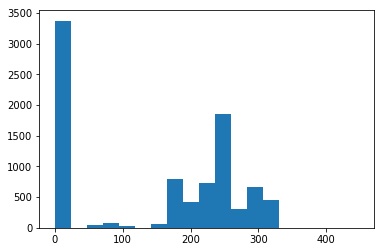

In [10]:
plt.hist(x=df[df['building_id']==0].meter_reading,bins='auto')

Building 0:


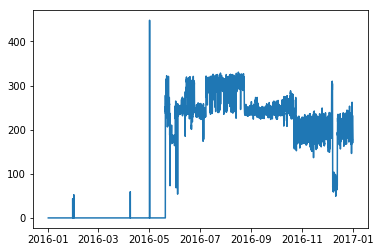

Building 1:


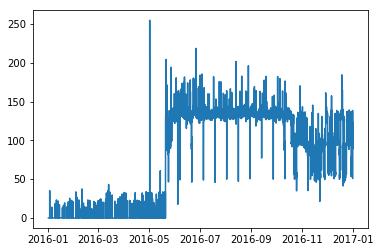

In [11]:
print('Building 0:')
plt.plot(df[df['building_id']==0].timestamp,df[df['building_id']==0].meter_reading)
plt.show()
print('Building 1:')
plt.plot(df[df['building_id']==1].timestamp,df[df['building_id']==1].meter_reading)

In [12]:
##Reduce memory usage:
# https://www.dataquest.io/blog/pandas-big-data/

In [13]:
##Feature engineering:
# Change date format:
df['hour']=df.timestamp.dt.hour
df['month']=df.timestamp.dt.month
df['year']=df.timestamp.dt.year
df['day']=df.timestamp.dt.day

In [14]:
##Missing values:

#Removing features with missing values for more than 30% of the dataset
dropped_features=["cloud_coverage","precip_depth_1_hr","year_built","floor_count"]
for x in dropped_features:
    df=df.drop(columns=x)
    
#Replacing missing values with median:
replace_median=["sea_level_pressure","wind_direction","air_temperature","dew_temperature","wind_speed"]
for x in replace_median:
    df[x].fillna(df[x].median(), inplace=True)

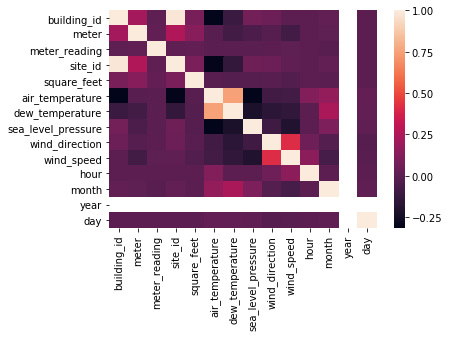

In [15]:
## Correlation matrix plot
corr=df.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

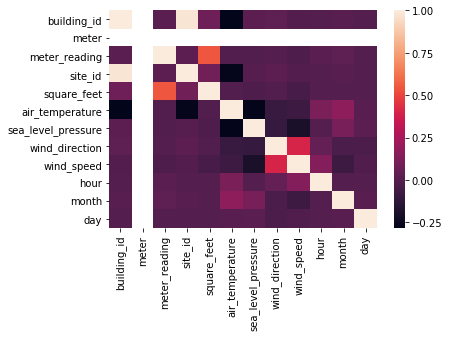

In [41]:
## Correlation matrix plot for meter 0
corr=df[df['meter']==0].corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

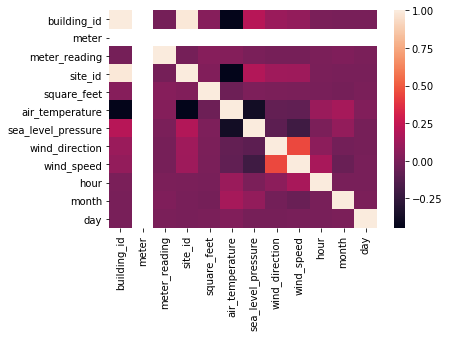

In [42]:
## Correlation matrix plot for meter 1
corr=df[df['meter']==1].corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

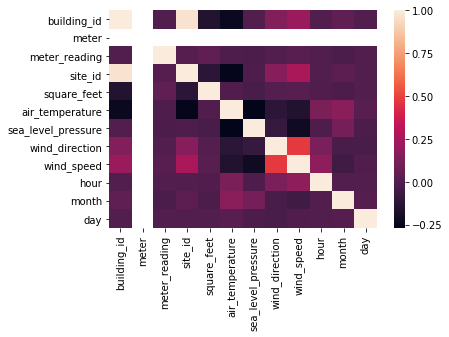

In [43]:
## Correlation matrix plot for meter 2
corr=df[df['meter']==2].corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

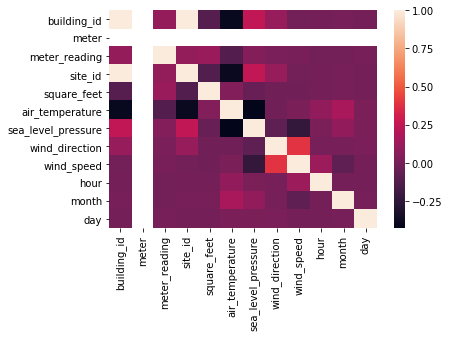

In [44]:
## Correlation matrix plot for meter 3
corr=df[df['meter']==3].corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [49]:
#One hot encoding meter:
df['meter_0']=(df['meter']==0)*1
df['meter_1']=(df['meter']==1)*1
df['meter_2']=(df['meter']==2)*1
df['meter_3']=(df['meter']==3)*1

In [50]:
##Dropping irrelevant features:
irrelevant=["timestamp","year","dew_temperature","primary_use","meter"]
for x in irrelevant:
    df=df.drop(columns=x)

In [17]:
##Reducing memory usage by switching to a matrix
df.info()
Mat=df.as_matrix()
print("%d bytes" % (Mat.size * Mat.itemsize))
#Nope not working

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20125605 entries, 0 to 20125604
Data columns (total 12 columns):
building_id           int64
meter                 int64
meter_reading         float64
site_id               int64
square_feet           int64
air_temperature       float64
sea_level_pressure    float64
wind_direction        float64
wind_speed            float64
hour                  int64
month                 int64
day                   int64
dtypes: float64(5), int64(7)
memory usage: 1.9 GB


/Users/principal/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


1932058080 bytes


In [40]:
##Memory usage reduction:
df_float = df.select_dtypes(include=['float'])
converted_float = df_float.apply(pd.to_numeric,downcast='float')
df_float.info()
print('\n')
converted_float.info()
print('\n')

df_int = df.select_dtypes(include=['int'])
converted_int = df_int.apply(pd.to_numeric,downcast='unsigned')
df_int.info()
print('\n')
converted_int.info()
print('\n')
df_int.head()
#Wow impressive :O

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20125605 entries, 0 to 20125604
Data columns (total 6 columns):
meter_reading         float64
square_feet           float64
air_temperature       float64
sea_level_pressure    float64
wind_direction        float64
wind_speed            float64
dtypes: float64(6)
memory usage: 1.0 GB


<class 'pandas.core.frame.DataFrame'>
Int64Index: 20125605 entries, 0 to 20125604
Data columns (total 6 columns):
meter_reading         float32
square_feet           float32
air_temperature       float32
sea_level_pressure    float32
wind_direction        float32
wind_speed            float32
dtypes: float32(6)
memory usage: 614.2 MB


<class 'pandas.core.frame.DataFrame'>
Int64Index: 20125605 entries, 0 to 20125604
Data columns (total 6 columns):
building_id    int64
meter          int64
site_id        int64
hour           int64
month          int64
day            int64
dtypes: int64(6)
memory usage: 1.0 GB


<class 'pandas.core.frame.DataFrame'>
Int64Ind

,building_id,meter,site_id,hour,month,day
0,0,0,0,0,1,1
1,1,0,0,0,1,1
2,2,0,0,0,1,1
3,3,0,0,0,1,1
4,4,0,0,0,1,1


In [18]:
for dtype in ['float','int','object']:
    selected_dtype = df.select_dtypes(include=[dtype])
    mean_usage_b = selected_dtype.memory_usage(deep=True).mean()
    mean_usage_mb = mean_usage_b / 1024 ** 2
    print("Average memory usage for {} columns: {:03.2f} MB".format(dtype,mean_usage_mb))

Average memory usage for float columns: 153.55 MB
Average memory usage for int columns: 153.55 MB
Average memory usage for object columns: 153.55 MB


In [19]:
gl_int = df.select_dtypes(include=['int'])
converted_int = gl_int.apply(pd.to_numeric,downcast='unsigned')

In [20]:
##Features by data_type
real_values=["square_feet","wind_direction","wind_speed","air_temperature","sea_level_pressure"]
cat=["primary_use"]
for x in real_values:
    df[x]=(df[x]-df[x].min())/(df[x].max()-df[x].min())
df.head()

,building_id,meter,meter_reading,site_id,square_feet,air_temperature,sea_level_pressure,wind_direction,wind_speed,hour,month,day
0,0,0,0.0,0,0.008173,0.708279,0.666235,0.0,0.0,0,1,1
1,1,0,0.0,0,0.002786,0.708279,0.666235,0.0,0.0,0,1,1
2,2,0,0.0,0,0.005822,0.708279,0.666235,0.0,0.0,0,1,1
3,3,0,0.0,0,0.026754,0.708279,0.666235,0.0,0.0,0,1,1
4,4,0,0.0,0,0.132985,0.708279,0.666235,0.0,0.0,0,1,1


In [26]:
#Meter_reading distribution by meter type:
df.groupby('meter').meter_reading.describe()

,count,mean,std,min,25%,50%,75%,max
meter,,,,,,,,
0,12017408.0,170.630566,379.536194,0.0,19.5000,62.7840,170.01725,79769.0
1,4160093.0,635.931604,8005.097008,0.0,11.5001,121.7530,466.96700,880374.0
2,2686678.0,13988.612443,420023.741536,0.0,45.7500,256.2000,1032.75000,21904700.0
3,1261426.0,383.836147,2507.009375,0.0,0.0000,38.9072,240.31800,160187.0


(array([2.699e+03, 1.088e+03, 8.040e+02, 8.990e+02, 9.720e+02, 8.550e+02,
        7.260e+02, 5.350e+02, 6.980e+02, 7.680e+02, 7.260e+02, 5.700e+02,
        7.650e+02, 7.130e+02, 5.240e+02, 7.050e+02, 8.020e+02, 8.190e+02,
        4.520e+02, 4.810e+02, 4.340e+02, 3.230e+02, 1.840e+02, 2.120e+02,
        2.130e+02, 1.950e+02, 1.310e+02, 1.490e+02, 1.610e+02, 1.090e+02,
        1.380e+02, 1.130e+02, 8.500e+01, 8.100e+01, 8.800e+01, 7.400e+01,
        7.900e+01, 4.800e+01, 6.900e+01, 6.200e+01, 3.500e+01, 2.600e+01,
        3.400e+01, 3.300e+01, 2.300e+01, 2.800e+01, 2.800e+01, 2.100e+01,
        1.700e+01, 1.800e+01, 1.100e+01, 1.900e+01, 1.300e+01, 2.600e+01,
        1.300e+01, 1.100e+01, 9.000e+00, 9.000e+00, 1.400e+01, 7.000e+00,
        8.000e+00, 1.400e+01, 1.000e+01, 4.000e+00, 4.000e+00, 7.000e+00,
        5.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([   42.2104    ,   199.75673239,   357.30306479,   514.84939718,
          672.39572958,   829.94206197,   987.488

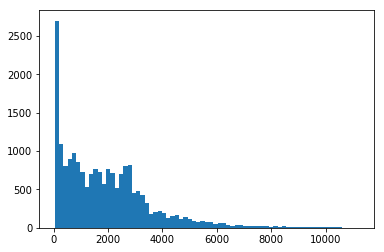

In [34]:
##Exponential distribution of targeted value when grouping by meter:
plt.hist(x=(df[(df['meter']==1) & (df['meter_reading']!=0) ].meter_reading[1:20000]),bins='auto')

In [53]:
df.head()

,building_id,meter_reading,site_id,square_feet,air_temperature,sea_level_pressure,wind_direction,wind_speed,hour,month,day,meter_0,meter_1,meter_2,meter_3
0,0,0.0,0,0.008173,0.708279,0.666235,0.0,0.0,0,1,1,1,0,0,0
1,1,0.0,0,0.002786,0.708279,0.666235,0.0,0.0,0,1,1,1,0,0,0
2,2,0.0,0,0.005822,0.708279,0.666235,0.0,0.0,0,1,1,1,0,0,0
3,3,0.0,0,0.026754,0.708279,0.666235,0.0,0.0,0,1,1,1,0,0,0
4,4,0.0,0,0.132985,0.708279,0.666235,0.0,0.0,0,1,1,1,0,0,0


In [22]:
##Feature engineering and transformations:
# 1- form 3 columns : hour ; day/month; year 
# 2- onehot encoding for meter category, site_id
# 3- missing values (remove or replace by median)
# 4- check if meter_reading is normally distributed if not try log? => when grouping by meter an exponential distribution appears

In [23]:
## Models:
# Regression => which loss function?
# Gradient boosting
# Machine learning (sklearn)

In [24]:
## How to improve score:
# https://www.dataquest.io/blog/kaggle-tips-tricks/
# https://www.import.io/post/how-to-win-a-kaggle-competition/
# http://www.data-mania.com/blog/how-to-win-kaggle/